## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import *

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공
from sklearn.pipeline import *

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
#

## [ statsmodels 패키지의 API 관련 참고 ]

https://www.statsmodels.org/stable/api.html

회귀 등의 분석을 위해 `statsmodels.api` 와 `statsmodels.formula.api` 둘 다 사용 가능하지만 용법이 조금씩 다르며, `statsmodels.formula.api`와는 달리 `statsmodels.api`의 경우 회귀분석 수행 전에 상수항을 추가시키는 작업이 필요하다.

# 다항 회귀분석

## 데이터프레임 생성

In [2]:
np.random.seed(0)
n_samples = 30
x = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * x) + np.random.randn(n_samples) * 0.1

dfx = pd.DataFrame(x, columns=["x"])
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfx, dfy], axis=1)
df

,x,y
0,0.020218,1.081908
1,0.071036,0.870276
2,0.087129,1.143862
3,0.118274,0.703221
4,0.143353,0.784947
5,0.383442,-0.252659
6,0.414662,-0.220661
7,0.423655,-0.265959
8,0.437587,-0.456264
9,0.461479,-0.530019


## 선형 회귀모델 생성 및 회귀분석

- 모델 생성  

`statsmodels.regression.linear_model.OLS( endog, exog=None, missing='none', hasconst=None, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

`statsmodels.formula.api.ols( formula, data, subset=None, drop_cols=None, *args, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html

- 모델 적합  
`model.fit(method='pinv', cov_type='nonrobust', cov_kwds=None, use_t=None, **kwargs)`  
Returns : `RegressionResults`  
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.fit.html

- 선형계수 출력  
`RegressionResults.params`

- 회귀 결과 요약  
`RegressionResults.summary( yname=None, xname=None, title=None, alpha=0.05 )`  
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.summary.html

- 적합된 모델에 대한 분산분석표 출력  
`statsmodels.stats.anova.anova_lm( *args, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html

In [3]:
# statsmodels.formula.api.ols() 사용 시
# 상수항 추가작업 불필요.

model = ols( formula = 'y ~ x + I(x**2) + I(x**3)', data = df )

fit_model = model.fit()

print( fit_model.params )
print()

print( fit_model.summary(alpha = 0.05) )
print()

# ANOVA
anova_lm(fit_model, test = 'F', typ = 1)

Intercept    1.169394
x           -2.196176
I(x ** 2)   -7.056700
I(x ** 3)    8.202858
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     289.3
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           4.40e-20
Time:                        06:31:11   Log-Likelihood:                 23.183
No. Observations:                  30   AIC:                            -38.37
Df Residuals:                      26   BIC:                            -32.76
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,6.098981,6.098981,423.451906,1.294321e-17
I(x ** 2),1.0,5.885779,5.885779,408.649250,2.002342e-17
I(x ** 3),1.0,0.516514,0.516514,35.861514,2.536419e-06
Residual,26.0,0.374478,0.014403,NaN,NaN


### 산점도와 회귀직선 출력

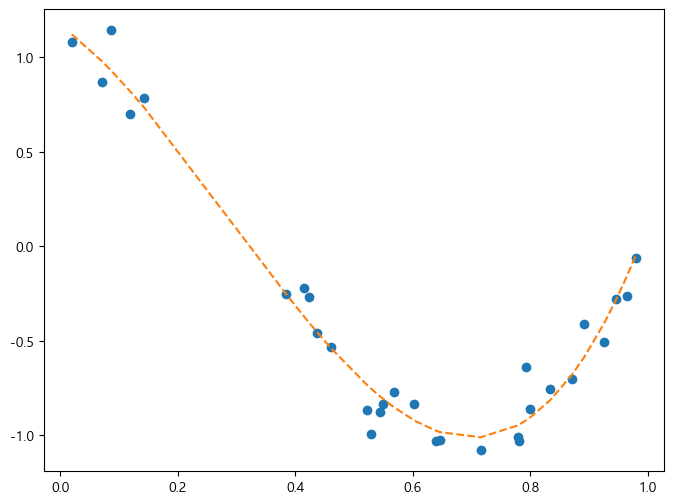

In [4]:
y_pred = fit_model.predict()
df['y_pred'] = y_pred

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o')
ax.plot(x, y_pred, '--' )

## 반응변수에 대한 예측

- 적합된 회귀 모델을 사용하여 예측  
`RegressionResults.predict( exog=None, transform=True, *args, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.predict.html

- 예측 결과를 계산  
`RegressionResults.get_prediction( exog=None, transform=True, weights=None, row_labels=None, **kwargs )`  
Returns : `PredictionResults`  
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.get_prediction.html

- 계산된 예측 결과를 데이터프레임으로 반환  
`PredictionResults.summary_frame( alpha=0.05 )`  
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.PredictionResults.summary_frame.html

- RMSE 출력  
`sklearn.metrics.mean_squared_error( y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True )`  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [5]:
# 예측값
fit_model.predict()

array([ 1.12217409,  0.98071782,  0.92989751,  0.82449941,  0.73371377,
       -0.24779155, -0.36978311, -0.40384975, -0.45553938, -0.54075177,
       -0.73266701, -0.75252791, -0.79536949, -0.80541149, -0.8516187 ,
       -0.92183543, -0.97616209, -0.98272203, -1.01002048, -0.94745309,
       -0.94329826, -0.9218341 , -0.90586633, -0.81644217, -0.68083826,
       -0.58361156, -0.40431122, -0.28747047, -0.15940478, -0.05012618])

In [6]:
# 예측 결과 계산 및 출력

predictions = fit_model.get_prediction()

predictions.summary_frame( alpha = 0.05 ).round(3)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1.122,0.080,0.957,1.287,0.825,1.419
1,0.981,0.056,0.865,1.096,0.708,1.253
2,0.930,0.052,0.823,1.037,0.661,1.199
3,0.824,0.048,0.725,0.924,0.559,1.090
4,0.734,0.048,0.635,0.833,0.468,1.000
5,-0.248,0.047,-0.344,-0.152,-0.512,0.017
6,-0.370,0.043,-0.458,-0.281,-0.632,-0.108
7,-0.404,0.042,-0.490,-0.318,-0.665,-0.143
8,-0.456,0.040,-0.538,-0.373,-0.716,-0.195
9,-0.541,0.037,-0.618,-0.464,-0.799,-0.282


In [7]:
# 생성한 회귀모델을 새로운 데이터에 적용하여 예측

# 반드시 컬럼 이름이 모델 적합에 사용한 fomular 와 일치해야 한다!!!
new_data = pd.DataFrame( { 'x' : [70,80,90,100] } )  

fit_model.predict( new_data )

0    2.778850e+06
1    4.154526e+06
2    5.922528e+06
3    8.132073e+06
dtype: float64

In [8]:
new_pred = fit_model.get_prediction( new_data )

new_pred.summary_frame( alpha = 0.05 ).round(3)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2778849.902,459573.202,1834183.655,3.723516e+06,1834183.655,3.723516e+06
1,4154525.893,687914.739,2740496.895,5.568555e+06,2740496.895,5.568555e+06
2,5922527.728,981584.373,3904852.154,7.940203e+06,3904852.154,7.940203e+06
3,8132072.555,1348800.783,5359572.839,1.090457e+07,5359572.839,1.090457e+07


In [9]:
# RMSE 계산
y_pred = fit_model.predict()

mean_squared_error( y, y_pred, squared = False)

0.11172558895135486

## 잔차분석

### 표준화 잔차

- 모델의 잔차  
`RegressionResults.resid`

- 표준화 잔차  
`RegressionResults.resid_pearson`

In [10]:
# 예측값
y_pred = fit_model.predict()

# 잔차
residual = fit_model.resid

# 표준화 잔차
r_norm = fit_model.resid_pearson

pd.DataFrame( { 'Predict' : y_pred,
                'Residual' : residual,
                'normalized Residual' : r_norm } ).round(3)

,Predict,Residual,normalized Residual
0,1.122,-0.040,-0.336
1,0.981,-0.110,-0.920
2,0.930,0.214,1.783
3,0.824,-0.121,-1.011
4,0.734,0.051,0.427
5,-0.248,-0.005,-0.041
6,-0.370,0.149,1.243
7,-0.404,0.138,1.149
8,-0.456,-0.001,-0.006
9,-0.541,0.011,0.089


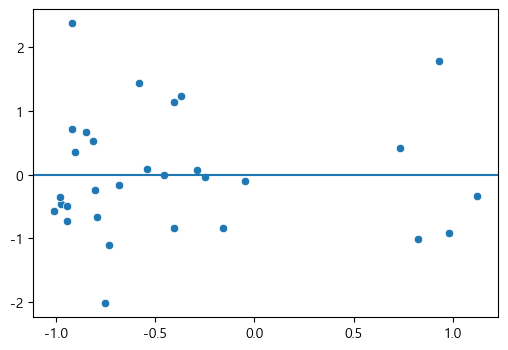

In [11]:
# 표준화잔차 vs. 적합값 도표 

fig, ax = plt.subplots( figsize = (6,4) )
sb.scatterplot( x = y_pred, y =r_norm )
ax.axhline(y=0)

### 선형 회귀모형에서의 오차항에 대한 가정 검토

#### 잔차에 대한 정규성 검토

##### 히스토그램

<AxesSubplot:ylabel='Density'>

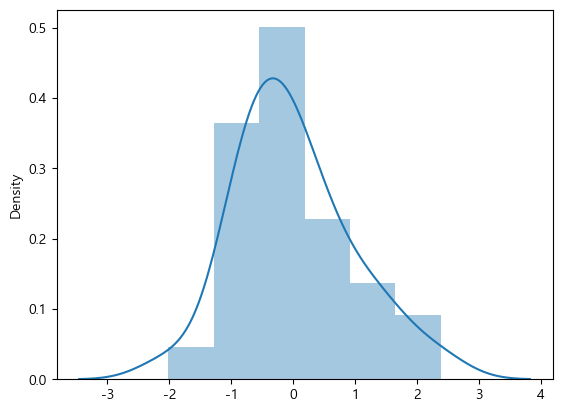

In [12]:
sb.distplot( r_norm )

##### Q-Q Plot

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-2.01727958, -1.10111403, -1.01055191, -0.92025138, -0.83788289,
         -0.8377583 , -0.72324717, -0.66006896, -0.5733261 , -0.49727969,
         -0.45527397, -0.35597121, -0.33551398, -0.23880049, -0.16164723,
         -0.09808859, -0.04056153, -0.00604124,  0.06998682,  0.08942817,
          0.36296057,  0.42690282,  0.5262326 ,  0.67253148,  0.72553749,
          1.14897233,  1.24255759,  1.44298772,  1.78285189,  2.37970877])),
 (0.9648625185273926, -1.7150924942533546e-14, 0.9804774875423695))

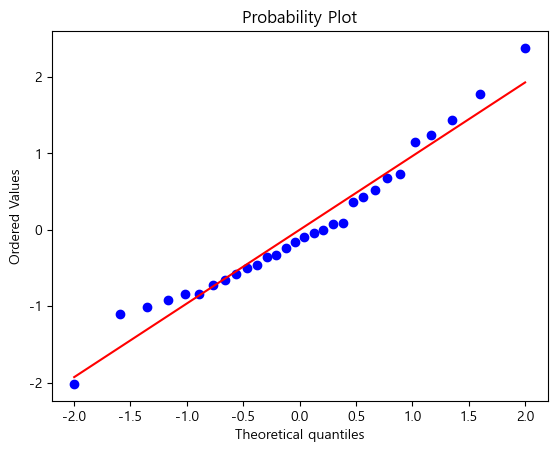

In [13]:
# Q-Q plot

stats.probplot( r_norm, plot = plt )

#### 오차항의 등분산성 검토

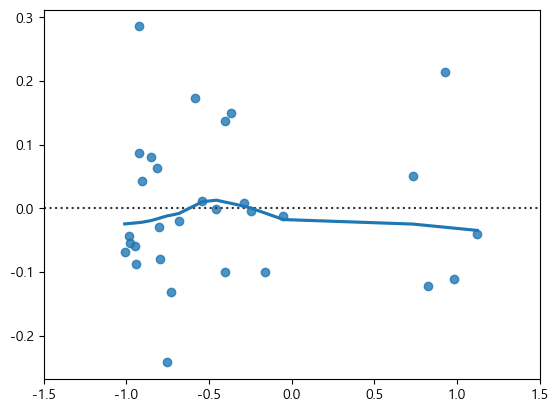

In [14]:
# 잔차 확인
sb.residplot( y_pred, y-y_pred, lowess = True )
plt.xlim(-1.5, 1.5)
plt.show()

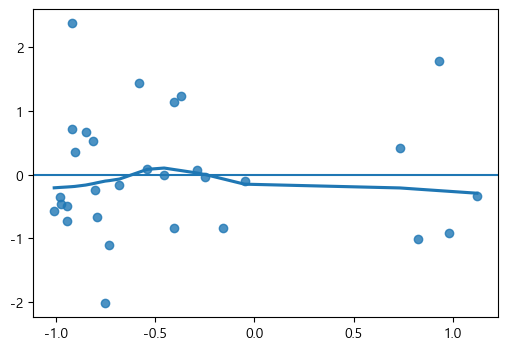

In [15]:
# 표준화잔차 vs. 적합값 도표 

fig, ax = plt.subplots( figsize = (6,4) )
sb.regplot( x = y_pred, y =r_norm, lowess = True )
ax.axhline(y=0)

#### 오차항의 독립성 검토

##### Durbin-Watson 통계량

- 2 에 가까우면 오차항의 독립성 만족,  
- 0 에 가까우면 양(+)의 자기상관관계,  
- 4 에 가까우면 음(-)의 자기상관관계

- `statsmodels.stats.stattools.durbin_watson( resids, axis=0 )` https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html

- 회귀 결과 요약 `RegressionResults.summary()`의 Durbin-Watson 항목에서도 확인 가능.

In [16]:
# 더빈-왓슨 통계량

print('Durbin-Watson :', durbin_watson( r_norm ))

Durbin-Watson : 1.9815676736839167


#### 회귀진단 결과 플로팅

- `statsmodels.graphics.regressionplots.plot_regress_exog(results, exog_idx, fig=None)` https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html

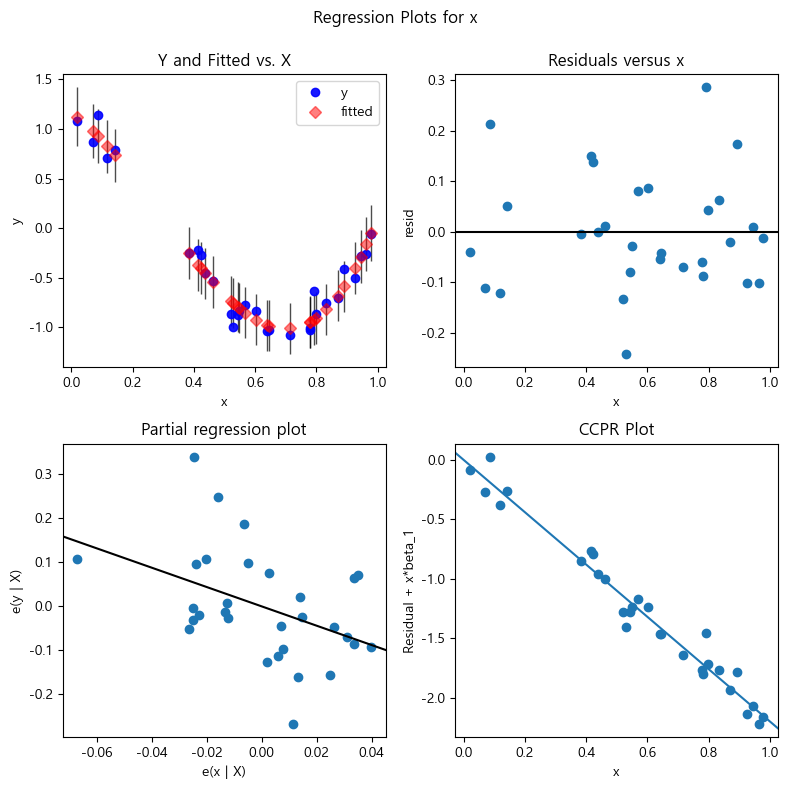

In [17]:
fig = plt.figure(figsize = (8, 8))

fig = plot_regress_exog( fit_model, 'x', fig = fig)

# [참고] sklearn으로 다항 회귀분석 수행

In [18]:
def polyreg(degree, seed=0, plot=True):
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])

    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]

    fit_model = model.fit(X, y)
    
    if plot:
        plt.scatter(X, y)
        xx = np.linspace(0, 1, 1000)
        plt.plot(xx, fit_model.predict(xx[:, np.newaxis]))
        plt.ylim(-2, 2)
        plt.show()
    
    reg = fit_model.named_steps["linear_regression"]
    return reg.coef_, reg.intercept_

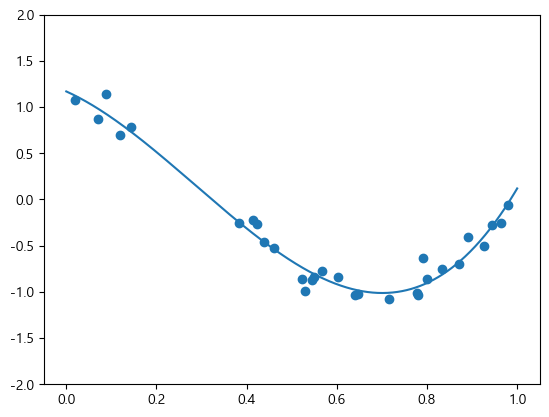

(array([ 0.        , -2.19617614, -7.05669992,  8.202858  ]),
 1.1693941158316383)

In [19]:
polyreg(3)

## 통계량에 해당되는 내용을 직접 코딩

### sklearn으로 회귀모델 생성 및 적합

- `sklearn.linear_model.LinearRegression( *, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False )`  
Attributes : `.coef_`, `.intercept_`, `.rank`, `.singular`
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [20]:
X_train = np.array(  [[1,0]]  )

# degree : 거듭제곱의 차수, include_bias : 편향값(1) 추가 여부
poly = PolynomialFeatures(degree=3, include_bias=True)

# 훈련 데이터셋 X_train 의 거듭제곱을 생성한 뒤, 훈련 데이터셋 X_train 에 새로운 변수로 추가
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[1., 1., 0., 1., 0., 0., 1., 0., 0., 0.]])

In [21]:
np.random.seed(0)
n_samples = 30
x = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * x) + np.random.randn(n_samples) * 0.1

In [22]:
polynomial_features = PolynomialFeatures(degree=3)  # 'degree = 차수' 입력
linear_regression = LinearRegression()
model = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])

x = x[:, np.newaxis]

fit_model = model.fit(x, y)
reg = fit_model.named_steps["linear_regression"]

In [23]:
n = len(y)
k = len(x)*3

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()

R-squared : 0.9709
Adj. R-squared : 0.9699



In [24]:
# 통계량 계산을 위한 데이터프레임 생성
result = pd.DataFrame( { 'Feature' : ['Intercept', '_', 'x', 'x**2', 'x**3'],
                         'Coefficients' : np.append(reg.intercept_, reg.coef_) } )

result

,Feature,Coefficients
0,Intercept,1.169394
1,_,0.000000
2,x,-2.196176
3,x**2,-7.056700
4,x**3,8.202858
